In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# For reproducibility
np.random.seed(42)

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully
Pandas version: 2.2.2
NumPy version: 2.0.2


In [ ]:
# Load all datasets
start_time = time.time()

train = pd.read_csv('https://media.githubusercontent.com/media/Husayn01/Academic-Research/refs/heads/main/Data/train.csv', sep=';')
test_features = pd.read_csv('https://media.githubusercontent.com/media/Husayn01/Academic-Research/refs/heads/main/Data/test_features.csv', sep=';')
test_target = pd.read_csv('https://media.githubusercontent.com/media/Husayn01/Academic-Research/refs/heads/main/Data/test_target.csv', sep=';')
hidden_test = pd.read_csv('https://media.githubusercontent.com/media/Husayn01/Academic-Research/refs/heads/main/Data/hidden_test.csv', sep=';')

runtime = time.time() - start_time
print(f"Data loading completed in {runtime:.2f} seconds")

Data loading completed in 7.97 seconds


In [ ]:
print("DATASET SHAPES")
print(f"Training set:        {train.shape}")
print(f"Test features:       {test_features.shape}")
print(f"Test target:         {test_target.shape}")
print(f"Hidden test:         {hidden_test.shape}")

DATASET SHAPES
Training set:        (1170511, 29)
Test features:       (136786, 27)
Test target:         (136786, 3)
Hidden test:         (122397, 29)


In [ ]:
print("DATA TYPES AND MEMORY USAGE")

print("\nTraining Set Data Types:")
print(train.dtypes)

DATA TYPES AND MEMORY USAGE

Training Set Data Types:
WELL                                  object
DEPTH_MD                             float64
X_LOC                                float64
Y_LOC                                float64
Z_LOC                                float64
GROUP                                 object
FORMATION                             object
CALI                                 float64
RSHA                                 float64
RMED                                 float64
RDEP                                 float64
RHOB                                 float64
GR                                   float64
SGR                                  float64
NPHI                                 float64
PEF                                  float64
DTC                                  float64
SP                                   float64
BS                                   float64
ROP                                  float64
DTS                                  float64
D

In [ ]:
start_time = time.time()

print("MEMORY USAGE ANALYSIS")

datasets = {
    'Training Set': train,
    'Test Features': test_features,
    'Test Target': test_target,
    'Hidden Test Set': hidden_test
}

for name, df in datasets.items():
    memory_mb = df.memory_usage(deep=True).sum() / (1024**2)
    print(f"{name:20s}: {memory_mb:>8.2f} MB")

# Identify categorical vs numerical columns
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

print("FEATURE TYPE CATEGORIZATION")
print(f"\nCategorical Features ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical Features ({len(numerical_cols)}): {numerical_cols}")

print(f"\nRuntime: {time.time() - start_time:.2f} seconds")

MEMORY USAGE ANALYSIS
Training Set        :   425.14 MB
Test Features       :    47.91 MB
Test Target         :     9.48 MB
Hidden Test Set     :    44.65 MB
FEATURE TYPE CATEGORIZATION

Categorical Features (3): ['WELL', 'GROUP', 'FORMATION']

Numerical Features (26): ['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE']

Runtime: 0.93 seconds


In [ ]:
print("\nTraining Set - Descriptive Statistics:")
train.describe()


Training Set - Descriptive Statistics:


,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


In [ ]:
print("TARGET VARIABLE ANALYSIS: LITHOLOGY DISTRIBUTION")

# Define lithology class mapping
# Based on industry standards and FORCE 2020 competition documentation
lithology_mapping = {
    30000: 'Sandstone',
    65030: 'Sandstone/Shale',
    65000: 'Shale',
    80000: 'Marl',
    74000: 'Dolomite',
    70000: 'Limestone',
    70032: 'Chalk',
    88000: 'Halite',
    86000: 'Anhydrite',
    99000: 'Tuff',
    90000: 'Coal',
    93000: 'Basement'
}

TARGET VARIABLE ANALYSIS: LITHOLOGY DISTRIBUTION


In [ ]:
# Reverse mapping for easy access
lithology_names = {v: k for k, v in lithology_mapping.items()}

print("\nLithology Class Mapping:")
for code, name in lithology_mapping.items():
    print(f"Code {code:6d} → {name}")


Lithology Class Mapping:
Code  30000 → Sandstone
Code  65030 → Sandstone/Shale
Code  65000 → Shale
Code  80000 → Marl
Code  74000 → Dolomite
Code  70000 → Limestone
Code  70032 → Chalk
Code  88000 → Halite
Code  86000 → Anhydrite
Code  99000 → Tuff
Code  90000 → Coal
Code  93000 → Basement


In [ ]:
start_time = time.time()
# Analyze target distribution in training set
target_col = 'FORCE_2020_LITHOFACIES_LITHOLOGY'

print("TRAINING SET TARGET DISTRIBUTION")
if target_col in train.columns:
    target_counts = train[target_col].value_counts().sort_index()
    target_pct = train[target_col].value_counts(normalize=True).sort_index() * 100

    print("\nClass Distribution:")
    print(f"{'Lithology Code':<20} {'Class Name':<25} {'Count':<12} {'Percentage':<12}")

    for code in sorted(train[target_col].unique()):
        name = lithology_mapping.get(code, 'Unknown')
        count = target_counts.get(code, 0)
        pct = target_pct.get(code, 0)
        print(f"{code:<20} {name:<25} {count:<12,} {pct:<12.2f}%")

    print(f"{'TOTAL':<20} {'':<25} {len(train):<12,} {'100.00':<12}%")

    # Calculate class imbalance metrics
    max_class = target_counts.max()
    min_class = target_counts.min()
    imbalance_ratio = max_class / min_class

    print("CLASS IMBALANCE METRICS")
    print(f"Most frequent class: {target_counts.idxmax()} with {max_class:,} samples")
    print(f"Least frequent class: {target_counts.idxmin()} with {min_class:,} samples")
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")
    print(f"Number of classes: {train[target_col].nunique()}")

print(f"\nRuntime: {time.time() - start_time:.2f} seconds")

TRAINING SET TARGET DISTRIBUTION

Class Distribution:
Lithology Code       Class Name                Count        Percentage  
30000                Sandstone                 168,937      14.43       %
65000                Shale                     720,803      61.58       %
65030                Sandstone/Shale           150,455      12.85       %
70000                Limestone                 56,320       4.81        %
70032                Chalk                     10,513       0.90        %
74000                Dolomite                  1,688        0.14        %
80000                Marl                      33,329       2.85        %
86000                Anhydrite                 1,085        0.09        %
88000                Halite                    8,213        0.70        %
90000                Coal                      3,820        0.33        %
93000                Basement                  103          0.01        %
99000                Tuff                      15,245      

In [ ]:
start_time = time.time()

print("MISSING VALUE ANALYSIS")

def analyze_missing(df, dataset_name):
    """Analyze missing values in a dataset"""
    print(f"\n{dataset_name}")

    missing_count = df.isnull().sum()
    missing_pct = (df.isnull().sum() / len(df)) * 100

    missing_df = pd.DataFrame({
        'Column': missing_count.index,
        'Missing_Count': missing_count.values,
        'Missing_Percentage': missing_pct.values
    })

    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
        'Missing_Percentage', ascending=False
    )

    if len(missing_df) > 0:
        print(f"\nFeatures with missing values: {len(missing_df)}")
        print(missing_df.to_string(index=False))

        total_missing = missing_count.sum()
        total_cells = df.shape[0] * df.shape[1]
        overall_missing_pct = (total_missing / total_cells) * 100
        print(f"\nOverall missingness: {overall_missing_pct:.2f}% ({total_missing:,}/{total_cells:,} cells)")
    else:
        print("No missing values detected in this dataset!")

    return missing_df

# Analyze each dataset
train_missing = analyze_missing(train, "TRAINING SET")
print(f"\nRuntime: {time.time() - start_time:.2f} seconds")

MISSING VALUE ANALYSIS

TRAINING SET

Features with missing values: 25
                           Column  Missing_Count  Missing_Percentage
                              SGR        1101158           94.074981
                              DTS         995898           85.082327
                             RMIC         994351           84.950163
                             ROPA         978186           83.569142
                             DCAL         871678           74.469868
                        MUDWEIGHT         854360           72.990344
                              RXO         843084           72.027004
                              ROP         635440           54.287401
                             RSHA         539861           46.121822
                              PEF         498819           42.615490
                               BS         487854           41.678720
                             NPHI         405102           34.608987
                               S

In [ ]:
test_missing = analyze_missing(test_features, "TEST FEATURES SET")


TEST FEATURES SET

Features with missing values: 23
   Column  Missing_Count  Missing_Percentage
      SGR         136786          100.000000
     RMIC         125470           91.727224
     DCAL         123271           90.119603
MUDWEIGHT         116517           85.181963
      RXO         106938           78.179053
     RSHA          97689           71.417397
      DTS          93566           68.403199
     ROPA          80996           59.213662
       SP          70159           51.291068
       BS          69822           51.044698
      ROP          68470           50.056292
     NPHI          32743           23.937391
     DRHO          25230           18.444870
      PEF          23283           17.021479
     RHOB          16960           12.398930
FORMATION           7074            5.171582
     CALI           5645            4.126884
      DTC            823            0.601670
     RMED            587            0.429137
    Y_LOC             59            0.043133
  

In [ ]:
hidden_missing = analyze_missing(hidden_test, "HIDDEN TEST SET")


HIDDEN TEST SET

Features with missing values: 24
                           Column  Missing_Count  Missing_Percentage
                        MUDWEIGHT         122397          100.000000
                              SGR         121258           99.069422
                              RXO         113503           92.733482
                             RMIC         107216           87.596918
                             RSHA          96714           79.016643
                             DCAL          79293           64.783451
                               SP          75672           61.825045
                             ROPA          58176           47.530577
                              DTS          49526           40.463410
                               BS          47908           39.141482
                              ROP          31247           25.529220
                             NPHI          25837           21.109178
                              PEF          21958    

VISUALIZATION: TARGET LITHOLOGY DISTRIBUTION


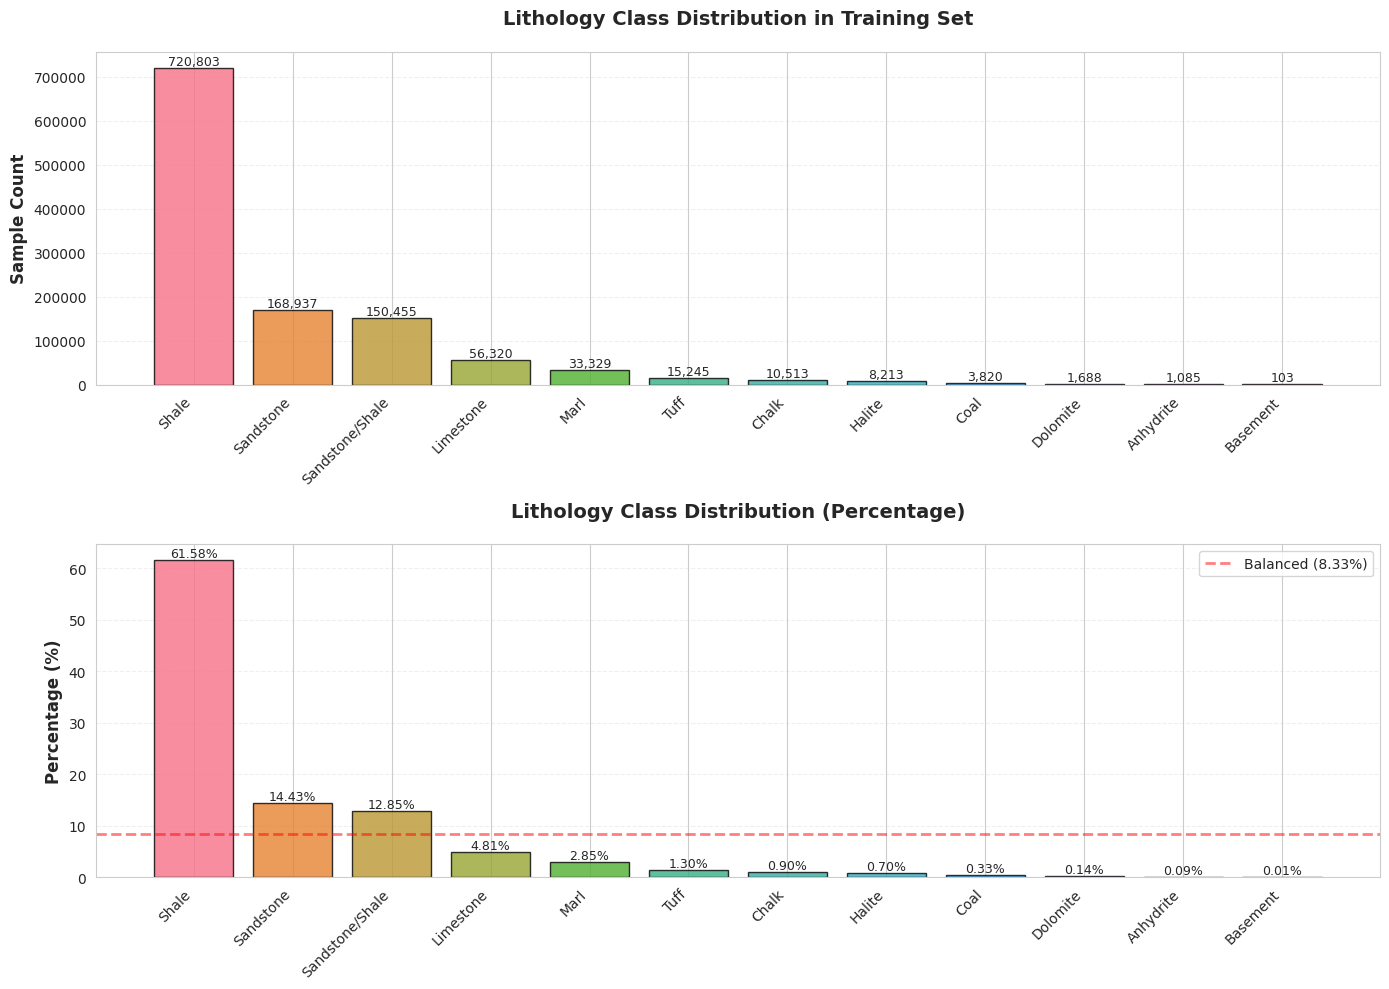


Runtime: 0.53 seconds


In [ ]:
start_time = time.time()

print("VISUALIZATION: TARGET LITHOLOGY DISTRIBUTION")

if target_col in train.columns:
    # Create mapped labels for visualization
    train['Lithology_Name'] = train[target_col].map(lithology_mapping)

    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # Plot 1: Bar chart with counts
    class_counts = train['Lithology_Name'].value_counts()
    colors = sns.color_palette("husl", len(class_counts))

    ax1 = axes[0]
    bars = ax1.bar(range(len(class_counts)), class_counts.values, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_xticks(range(len(class_counts)))
    ax1.set_xticklabels(class_counts.index, rotation=45, ha='right')
    ax1.set_ylabel('Sample Count', fontsize=12, fontweight='bold')
    ax1.set_title('Lithology Class Distribution in Training Set', fontsize=14, fontweight='bold', pad=20)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')

    # Add count labels on bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=9)

    # Plot 2: Percentage distribution
    class_pct = (train['Lithology_Name'].value_counts() / len(train) * 100)

    ax2 = axes[1]
    bars2 = ax2.bar(range(len(class_pct)), class_pct.values, color=colors, alpha=0.8, edgecolor='black')
    ax2.set_xticks(range(len(class_pct)))
    ax2.set_xticklabels(class_pct.index, rotation=45, ha='right')
    ax2.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Lithology Class Distribution (Percentage)', fontsize=14, fontweight='bold', pad=20)
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    ax2.axhline(y=100/12, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Balanced (8.33%)')
    ax2.legend()

    # Add percentage labels on bars
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

print(f"\nRuntime: {time.time() - start_time:.2f} seconds")

VISUALIZATION: MISSING VALUE PATTERNS


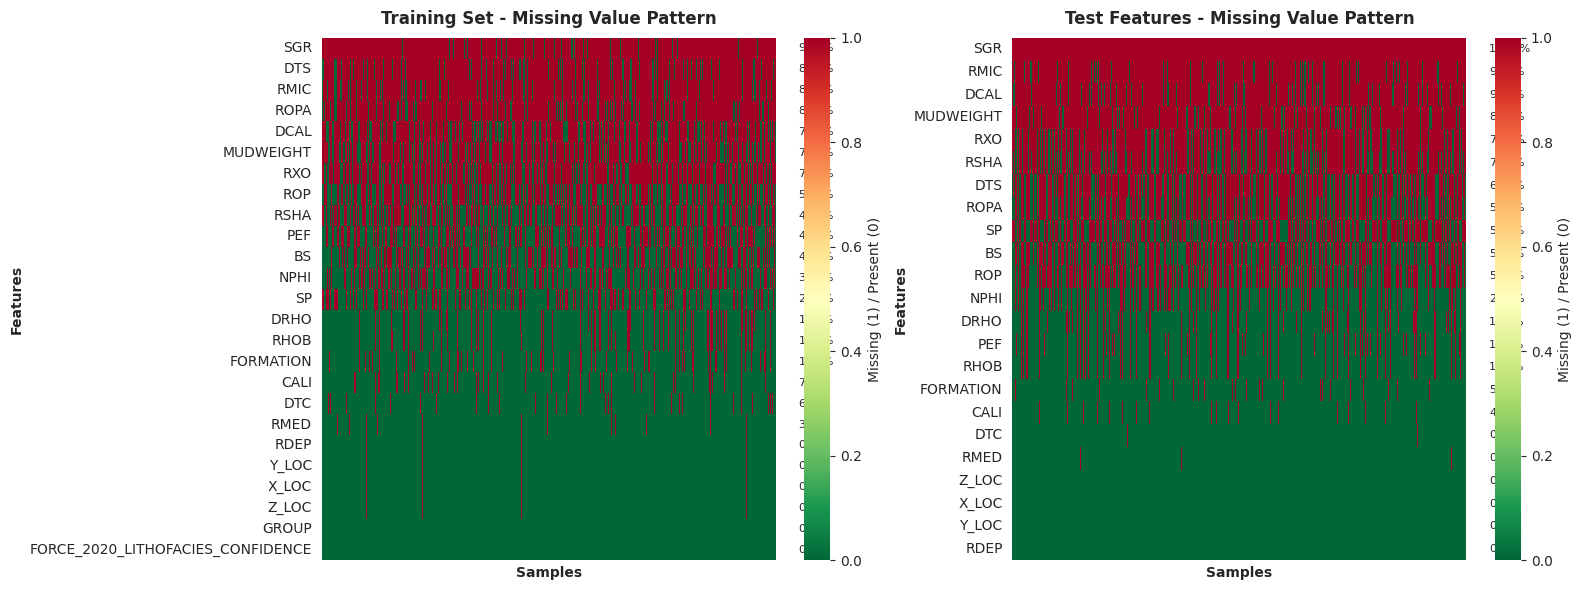

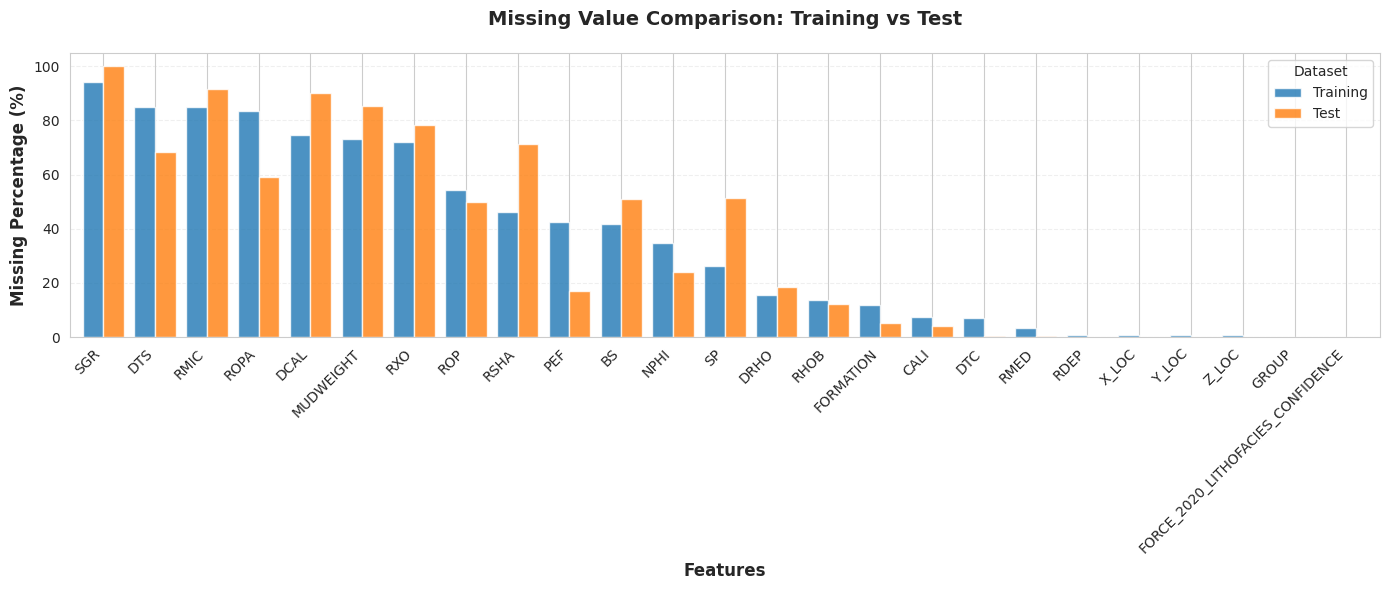


Runtime: 1.91 seconds


In [ ]:
start_time = time.time()

print("VISUALIZATION: MISSING VALUE PATTERNS")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Function to create missing value heatmap
def plot_missing_heatmap(df, ax, title):
    # Calculate missing percentage for each column
    missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_cols = missing_pct[missing_pct > 0]

    if len(missing_cols) > 0:
        # Create a subset of data with missing values
        missing_data = df[missing_cols.index].isnull().astype(int)

        # Sample if too many rows (for visualization clarity)
        if len(missing_data) > 1000:
            missing_data = missing_data.sample(1000, random_state=42)

        # Plot heatmap
        sns.heatmap(missing_data.T, cmap='RdYlGn_r', cbar_kws={'label': 'Missing (1) / Present (0)'},
                   ax=ax, yticklabels=True, xticklabels=False)
        ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
        ax.set_ylabel('Features', fontsize=10, fontweight='bold')
        ax.set_xlabel('Samples', fontsize=10, fontweight='bold')

        # Add text with missing percentages
        for idx, (col, pct) in enumerate(missing_cols.items()):
            ax.text(len(missing_data) + 50, idx + 0.5, f'{pct:.1f}%',
                   va='center', fontsize=8)
    else:
        ax.text(0.5, 0.5, 'No Missing Values', ha='center', va='center',
               transform=ax.transAxes, fontsize=14, fontweight='bold')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')
        ax.set_title(title, fontsize=12, fontweight='bold', pad=10)

# Plot for training set
plot_missing_heatmap(train, axes[0], 'Training Set - Missing Value Pattern')

# Plot for test features
plot_missing_heatmap(test_features, axes[1], 'Test Features - Missing Value Pattern')

plt.tight_layout()
plt.show()

# Summary bar chart of missing percentages
fig, ax = plt.subplots(figsize=(14, 6))

all_missing = pd.DataFrame({
    'Training': (train.isnull().sum() / len(train) * 100),
    'Test': (test_features.isnull().sum() / len(test_features) * 100)
})

# Only show features with at least some missing values
all_missing = all_missing[(all_missing > 0).any(axis=1)].sort_values('Training', ascending=False)

if len(all_missing) > 0:
    all_missing.plot(kind='bar', ax=ax, width=0.8, alpha=0.8)
    ax.set_title('Missing Value Comparison: Training vs Test', fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Features', fontsize=12, fontweight='bold')
    ax.legend(title='Dataset', fontsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\n No missing values found in either dataset!")

print(f"\nRuntime: {time.time() - start_time:.2f} seconds")

VISUALIZATION: FEATURE CORRELATION ANALYSIS

Analyzing correlations for 20 numerical features...


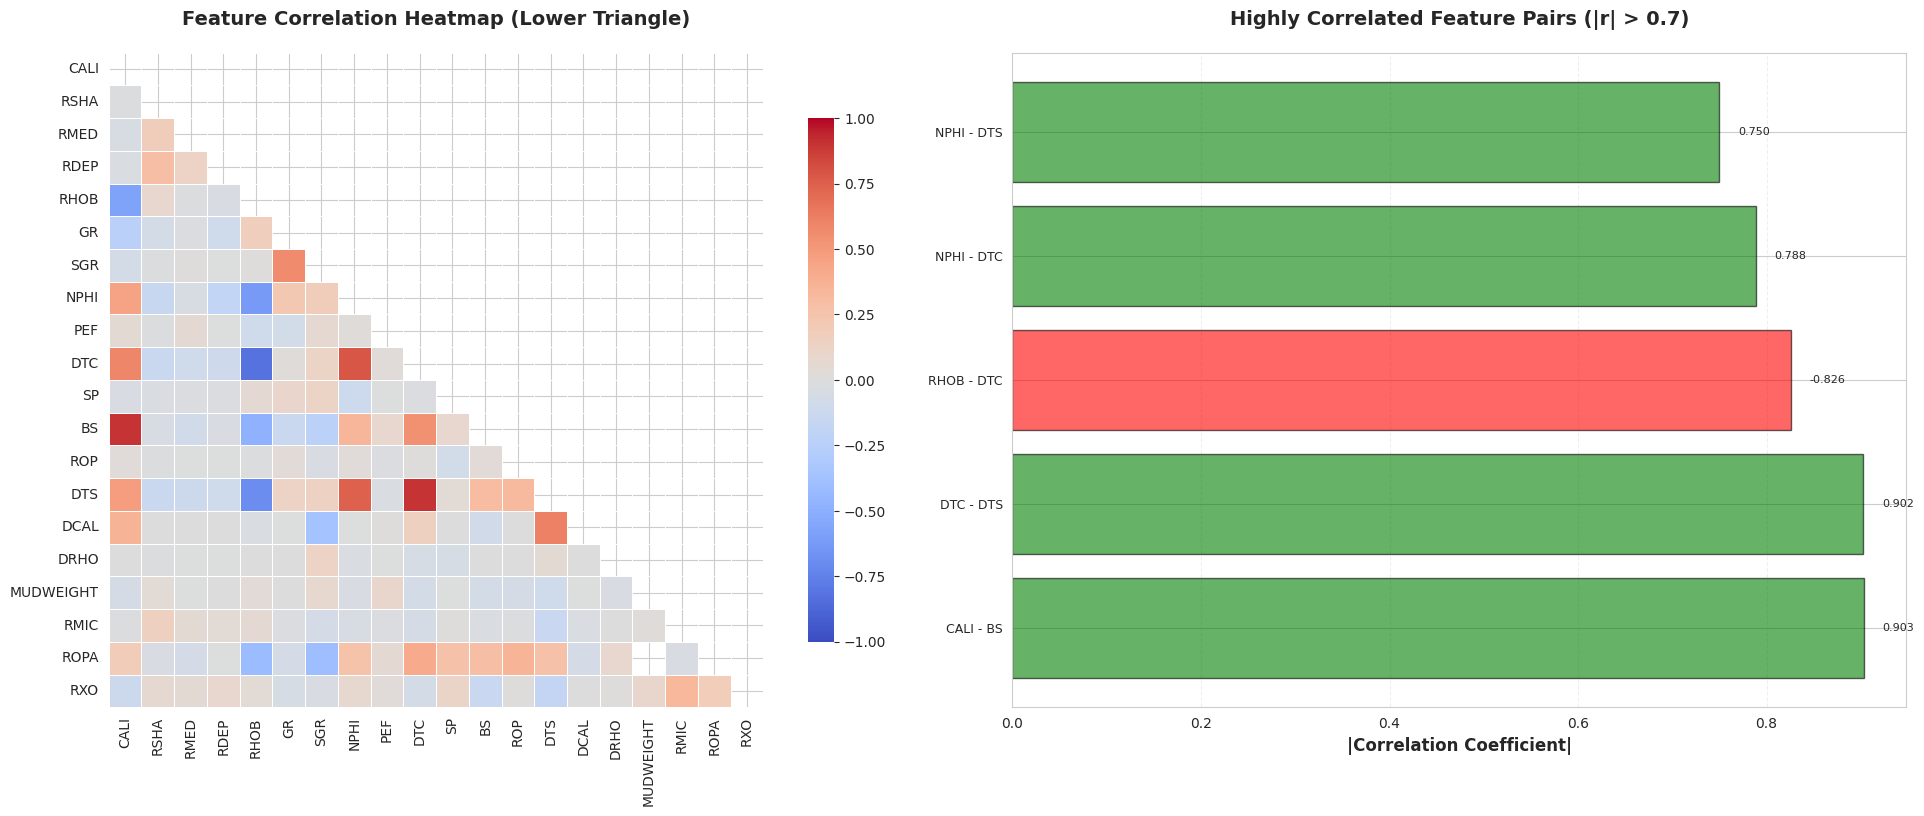

CORRELATION SUMMARY
Number of feature pairs analyzed: 190
Highly correlated pairs (|r| > 0.7): 5

Top 5 strongest correlations:
Feature 1 Feature 2  Correlation
     CALI        BS     0.903260
      DTC       DTS     0.902305
     RHOB       DTC    -0.825593
     NPHI       DTC     0.788425
     NPHI       DTS     0.749595

Runtime: 1.23 seconds


In [ ]:
start_time = time.time()

print("VISUALIZATION: FEATURE CORRELATION ANALYSIS")

# Select only numerical features (excluding identifiers and target)
exclude_cols = ['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC',
                target_col, 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'Lithology_Name']
numerical_features = [col for col in train.select_dtypes(include=[np.number]).columns
                     if col not in exclude_cols]

print(f"\nAnalyzing correlations for {len(numerical_features)} numerical features...")

if len(numerical_features) > 0:
    # Calculate correlation matrix
    corr_matrix = train[numerical_features].corr()

    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot 1: Full correlation heatmap
    ax1 = axes[0]
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax1,
                vmin=-1, vmax=1)
    ax1.set_title('Feature Correlation Heatmap (Lower Triangle)',
                  fontsize=14, fontweight='bold', pad=20)

    # Plot 2: Highly correlated features
    ax2 = axes[1]
    # Find highly correlated pairs (|correlation| > 0.7, excluding diagonal)
    high_corr = []
    for i in range(len(corr_matrix)):
        for j in range(i+1, len(corr_matrix)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr.append({
                    'Feature 1': corr_matrix.index[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })

    if high_corr:
        high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', key=abs, ascending=False)

        colors = ['red' if x < 0 else 'green' for x in high_corr_df['Correlation']]
        bars = ax2.barh(range(len(high_corr_df)), high_corr_df['Correlation'].abs(),
                       color=colors, alpha=0.6, edgecolor='black')

        # Add labels
        labels = [f"{row['Feature 1']} - {row['Feature 2']}"
                 for _, row in high_corr_df.iterrows()]
        ax2.set_yticks(range(len(high_corr_df)))
        ax2.set_yticklabels(labels, fontsize=9)
        ax2.set_xlabel('|Correlation Coefficient|', fontsize=12, fontweight='bold')
        ax2.set_title('Highly Correlated Feature Pairs (|r| > 0.7)',
                     fontsize=14, fontweight='bold', pad=20)
        ax2.grid(axis='x', alpha=0.3, linestyle='--')

        # Add correlation values on bars
        for idx, (bar, corr) in enumerate(zip(bars, high_corr_df['Correlation'])):
            ax2.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
                    f'{corr:.3f}', va='center', fontsize=8)
    else:
        ax2.text(0.5, 0.5, 'No highly correlated pairs found\n(|correlation| > 0.7)',
                ha='center', va='center', transform=ax2.transAxes,
                fontsize=12, fontweight='bold')
        ax2.axis('off')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("CORRELATION SUMMARY")
    print(f"Number of feature pairs analyzed: {len(corr_matrix) * (len(corr_matrix)-1) / 2:.0f}")
    if high_corr:
        print(f"Highly correlated pairs (|r| > 0.7): {len(high_corr_df)}")
        print("\nTop 5 strongest correlations:")
        print(high_corr_df.head().to_string(index=False))

print(f"\nRuntime: {time.time() - start_time:.2f} seconds")

VISUALIZATION: KEY FEATURE DISTRIBUTIONS BY LITHOLOGY

Visualizing distributions for: ['RHOB', 'GR', 'NPHI', 'DTC']


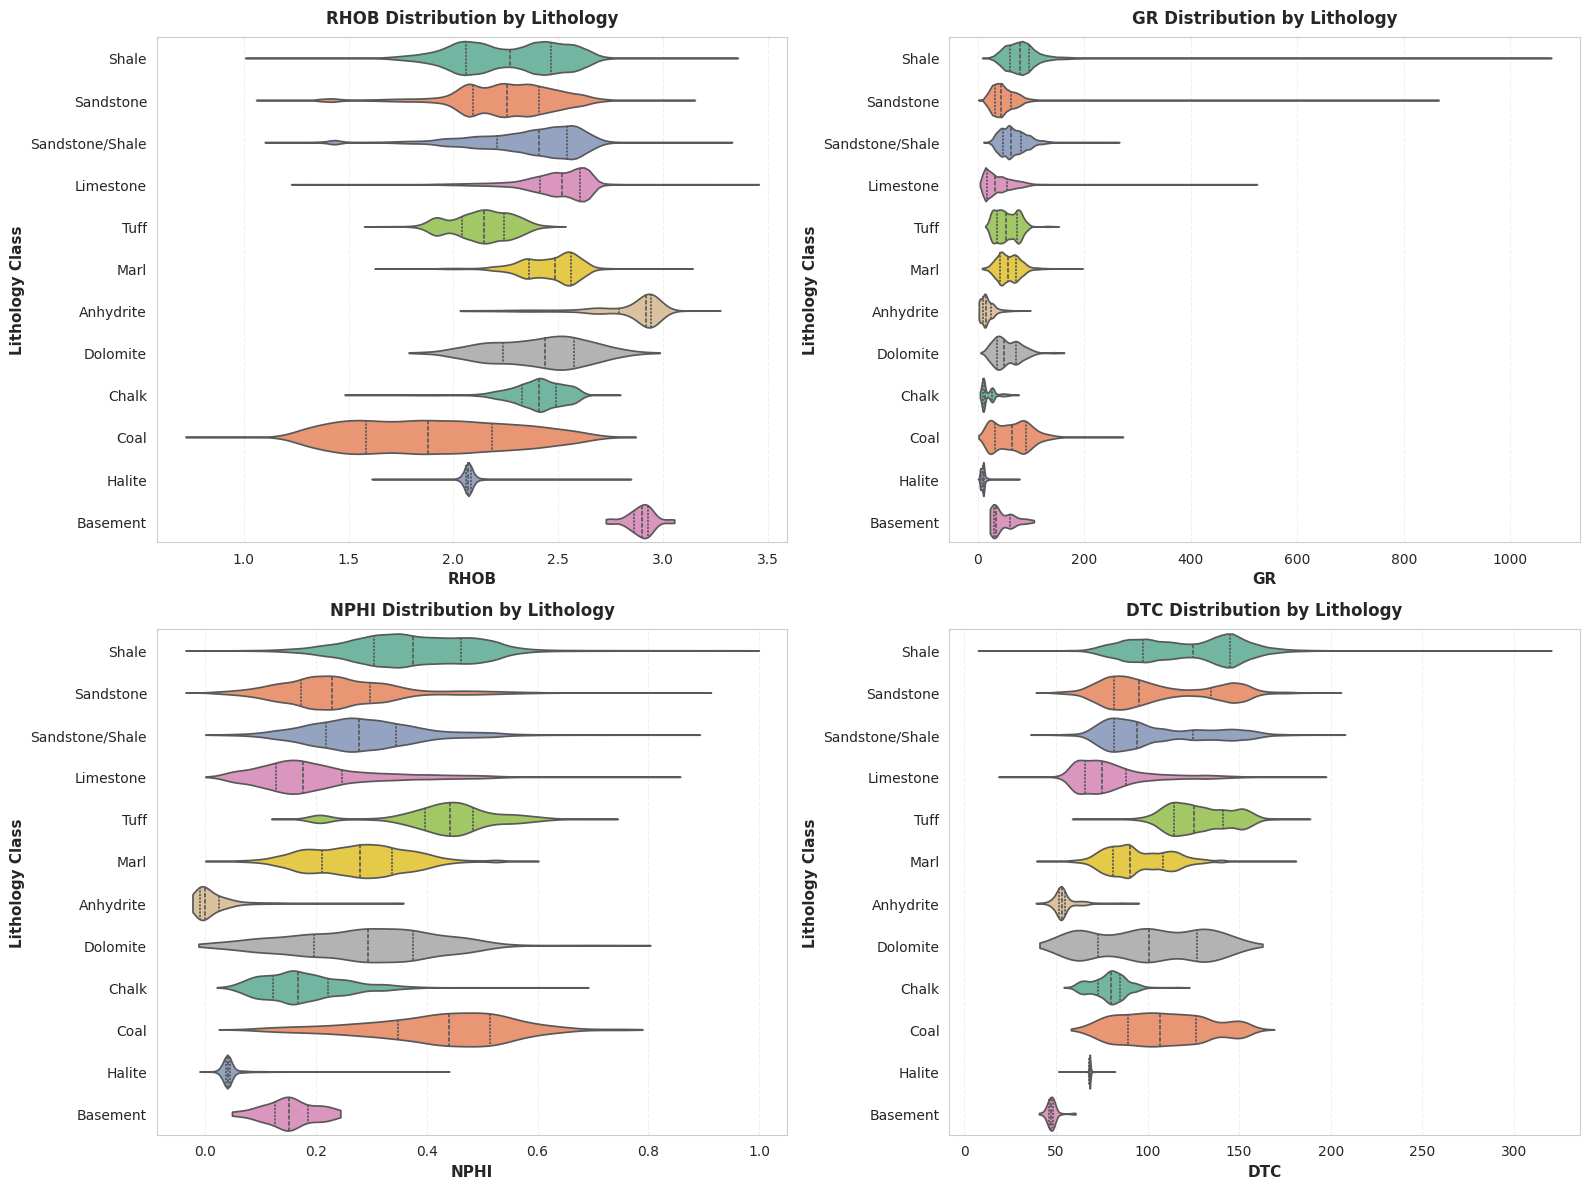

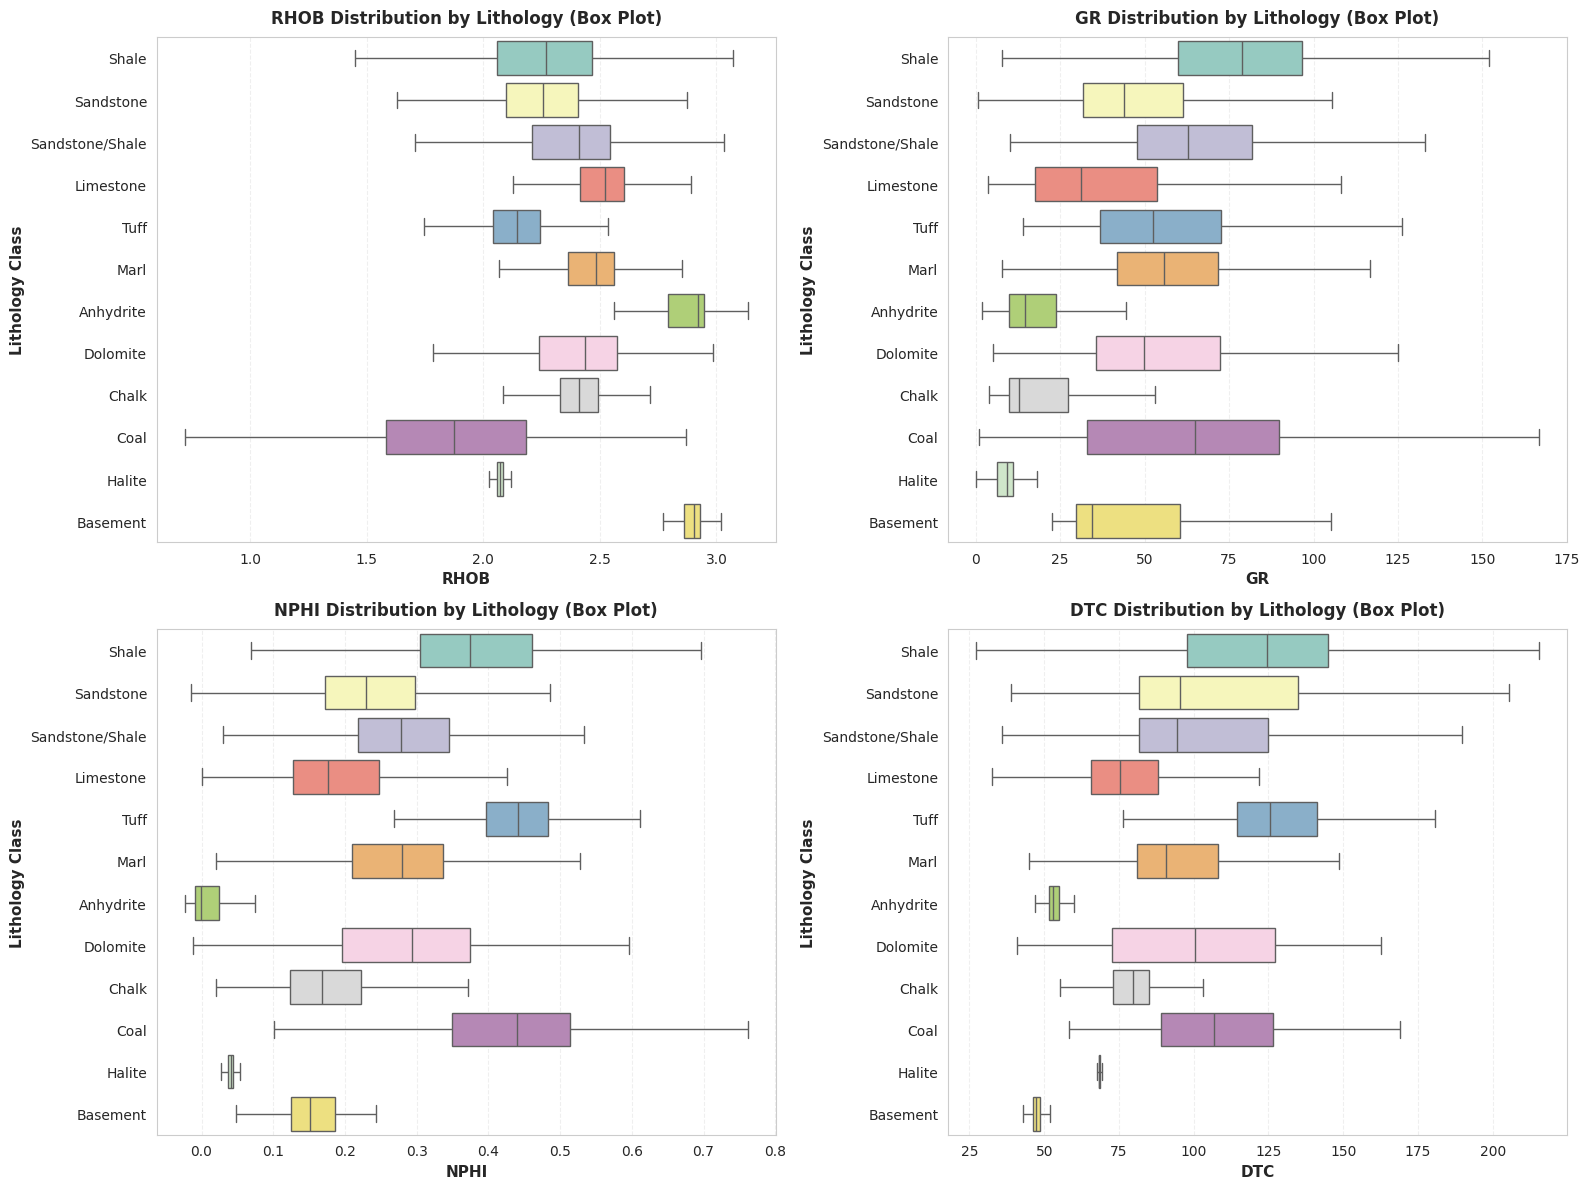


Runtime: 30.69 seconds


In [ ]:
start_time = time.time()

print("VISUALIZATION: KEY FEATURE DISTRIBUTIONS BY LITHOLOGY")

# Select key well log features for visualization
key_logs = ['RHOB', 'GR', 'NPHI', 'DTC']
available_logs = [log for log in key_logs if log in train.columns]

print(f"\nVisualizing distributions for: {available_logs}")

if available_logs and 'Lithology_Name' in train.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for idx, feature in enumerate(available_logs[:4]):
        ax = axes[idx]

        # Create violin plot
        sns.violinplot(data=train, y='Lithology_Name', x=feature, ax=ax,
                      palette='Set2', inner='quartile', cut=0)

        ax.set_title(f'{feature} Distribution by Lithology',
                    fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel(feature, fontsize=11, fontweight='bold')
        ax.set_ylabel('Lithology Class', fontsize=11, fontweight='bold')
        ax.grid(axis='x', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.show()

    # Box plots for the same features
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for idx, feature in enumerate(available_logs[:4]):
        ax = axes[idx]

        # Create box plot
        sns.boxplot(data=train, y='Lithology_Name', x=feature, ax=ax,
                   palette='Set3', showfliers=False)

        ax.set_title(f'{feature} Distribution by Lithology (Box Plot)',
                    fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel(feature, fontsize=11, fontweight='bold')
        ax.set_ylabel('Lithology Class', fontsize=11, fontweight='bold')
        ax.grid(axis='x', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.show()

print(f"\nRuntime: {time.time() - start_time:.2f} seconds")

VISUALIZATION: FEATURE CROSSPLOTS (RELATIONSHIPS)

Creating crossplots for 4 feature pairs...


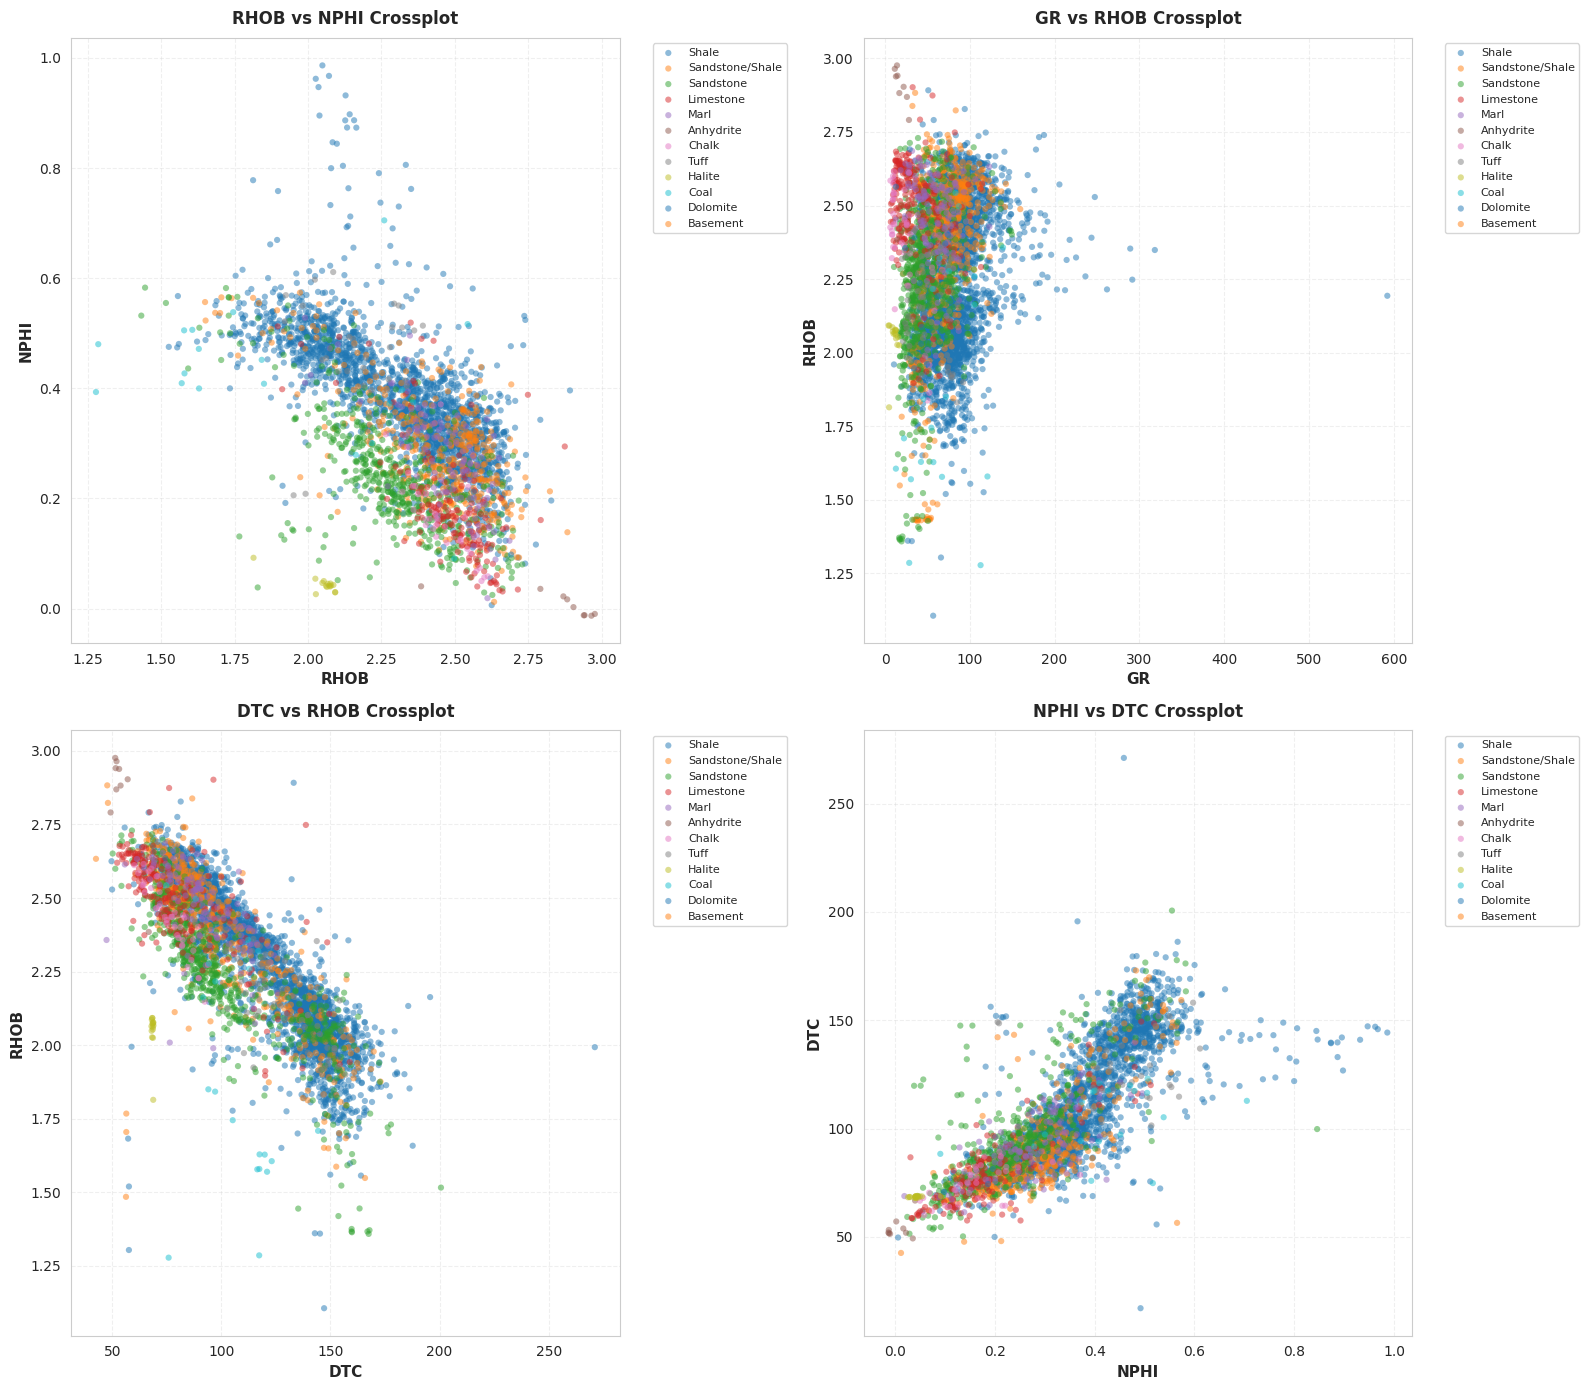


 Crossplot visualizations created successfully

Runtime: 1.37 seconds


In [ ]:
start_time = time.time()

print("VISUALIZATION: FEATURE CROSSPLOTS (RELATIONSHIPS)")

# Key feature pairs for crossplotting
crossplot_pairs = [
    ('RHOB', 'NPHI'),  # Density vs Neutron Porosity
    ('GR', 'RHOB'),    # Gamma Ray vs Density
    ('DTC', 'RHOB'),   # Sonic vs Density
    ('NPHI', 'DTC')    # Neutron Porosity vs Sonic
]

# Filter available pairs
available_pairs = [(f1, f2) for f1, f2 in crossplot_pairs
                   if f1 in train.columns and f2 in train.columns]

print(f"\nCreating crossplots for {len(available_pairs)} feature pairs...")

if available_pairs and 'Lithology_Name' in train.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()

    # Sample data for clearer visualization (if dataset is large)
    plot_data = train.sample(min(5000, len(train)), random_state=42)

    for idx, (feature1, feature2) in enumerate(available_pairs[:4]):
        ax = axes[idx]

        # Create scatter plot colored by lithology
        for lith_class in plot_data['Lithology_Name'].unique():
            mask = plot_data['Lithology_Name'] == lith_class
            ax.scatter(plot_data.loc[mask, feature1],
                      plot_data.loc[mask, feature2],
                      label=lith_class, alpha=0.5, s=20, edgecolors='none')

        ax.set_xlabel(feature1, fontsize=11, fontweight='bold')
        ax.set_ylabel(feature2, fontsize=11, fontweight='bold')
        ax.set_title(f'{feature1} vs {feature2} Crossplot',
                    fontsize=12, fontweight='bold', pad=10)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        ax.grid(True, alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.show()

    print("\n Crossplot visualizations created successfully")

print(f"\nRuntime: {time.time() - start_time:.2f} seconds")

In [ ]:
print("WELL-LEVEL ANALYSIS")

if 'WELL' in train.columns:
    # Analyze number of samples per well
    well_counts = train['WELL'].value_counts().sort_values(ascending=False)

    print(f"\nTotal number of wells in training set: {train['WELL'].nunique()}")
    print(f"Average samples per well: {well_counts.mean():.0f}")
    print(f"Median samples per well: {well_counts.median():.0f}")
    print(f"Min samples per well: {well_counts.min()}")
    print(f"Max samples per well: {well_counts.max()}")

    print("TOP 10 WELLS BY SAMPLE COUNT")
    print(well_counts.head(10).to_frame('Sample Count'))

WELL-LEVEL ANALYSIS

Total number of wells in training set: 98
Average samples per well: 11944
Median samples per well: 12534
Min samples per well: 1734
Max samples per well: 25131
TOP 10 WELLS BY SAMPLE COUNT
           Sample Count
WELL                   
25/2-7            25131
29/6-1            24464
25/7-2            23879
35/11-6           23544
34/2-4            23403
34/11-2 S         23310
25/4-5            23005
34/10-21          22491
30/6-5            21636
25/3-1            21186


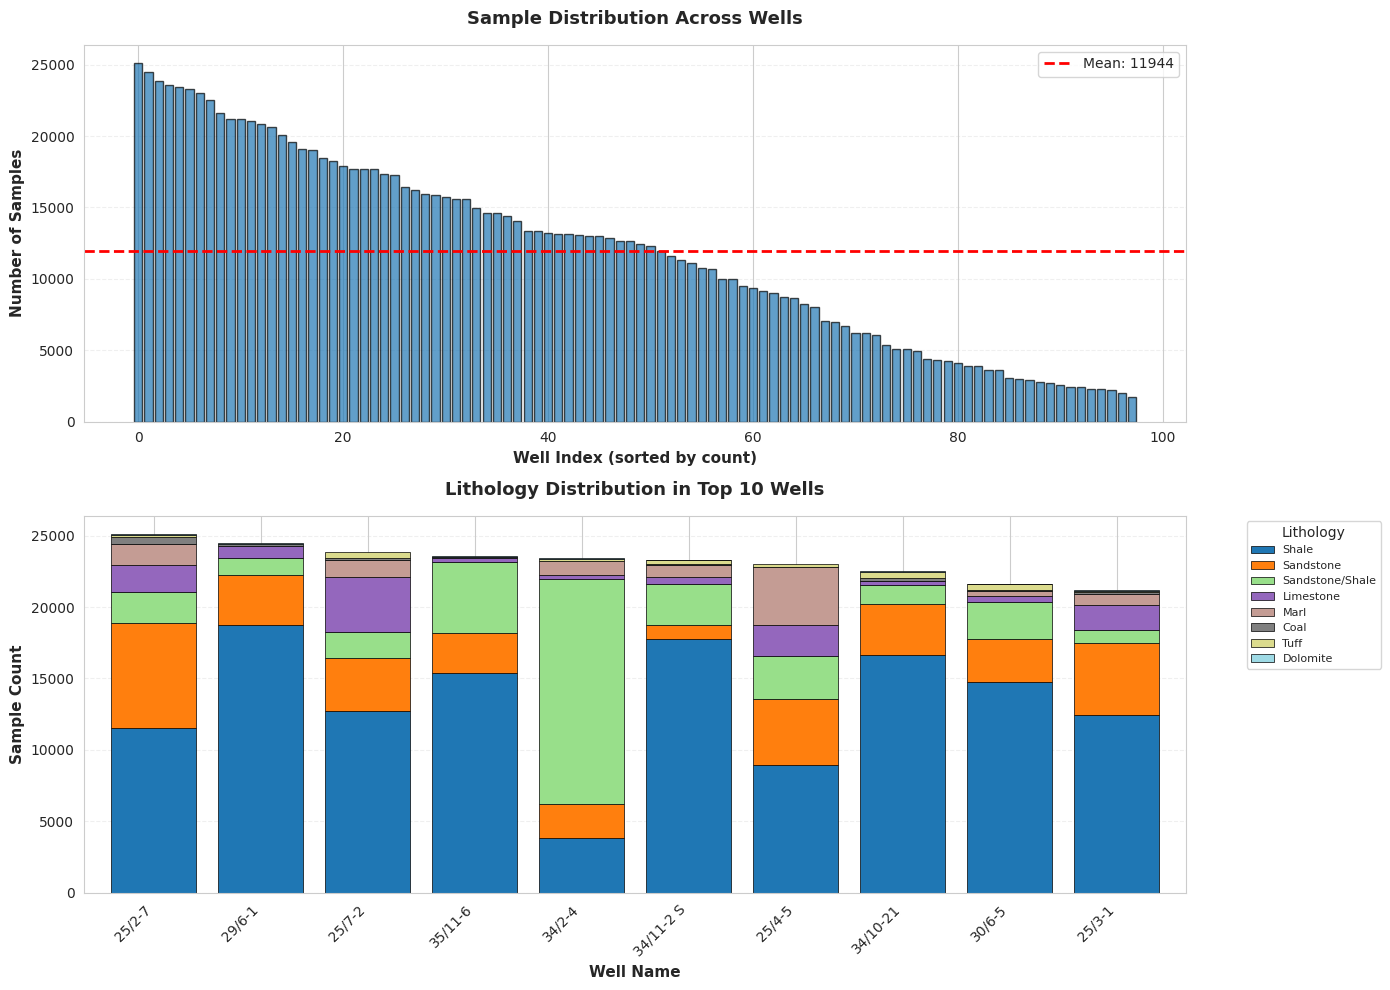


Runtime: 1.41 seconds


In [ ]:
start_time = time.time()
if 'WELL' in train.columns:

    # Visualize well distribution
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # Plot 1: Samples per well
    ax1 = axes[0]
    ax1.bar(range(len(well_counts)), well_counts.values, alpha=0.7, edgecolor='black')
    ax1.set_xlabel('Well Index (sorted by count)', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Number of Samples', fontsize=11, fontweight='bold')
    ax1.set_title('Sample Distribution Across Wells', fontsize=13, fontweight='bold', pad=15)
    ax1.axhline(y=well_counts.mean(), color='red', linestyle='--',
               linewidth=2, label=f'Mean: {well_counts.mean():.0f}')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3, linestyle='--')

    # Plot 2: Lithology distribution per well (for top 10 wells)
    ax2 = axes[1]
    if 'Lithology_Name' in train.columns:
        top_10_wells = well_counts.head(10).index
        well_lith_data = []

        for well in top_10_wells:
            well_data = train[train['WELL'] == well]['Lithology_Name'].value_counts()
            well_lith_data.append(well_data)

        well_lith_df = pd.DataFrame(well_lith_data, index=top_10_wells).fillna(0)
        well_lith_df.plot(kind='bar', stacked=True, ax=ax2,
                         colormap='tab20', width=0.8, edgecolor='black', linewidth=0.5)

        ax2.set_xlabel('Well Name', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Sample Count', fontsize=11, fontweight='bold')
        ax2.set_title('Lithology Distribution in Top 10 Wells',
                     fontsize=13, fontweight='bold', pad=15)
        ax2.legend(title='Lithology', bbox_to_anchor=(1.05, 1),
                  loc='upper left', fontsize=8)
        ax2.grid(axis='y', alpha=0.3, linestyle='--')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

print(f"\nRuntime: {time.time() - start_time:.2f} seconds")

In [ ]:
print("GEOLOGICAL CONTEXT ANALYSIS")


# Analyze GROUP distribution
if 'GROUP' in train.columns:
    print("\nGEOLOGICAL GROUPS:")
    group_counts = train['GROUP'].value_counts()
    print(group_counts.to_frame('Sample Count'))

    print(f"\nTotal unique groups: {train['GROUP'].nunique()}")

GEOLOGICAL CONTEXT ANALYSIS

GEOLOGICAL GROUPS:
                  Sample Count
GROUP                         
HORDALAND GP.           293155
SHETLAND GP.            234028
VIKING GP.              131999
ROGALAND GP.            131944
DUNLIN GP.              119085
NORDLAND GP.            111490
CROMER KNOLL GP.         52320
BAAT GP.                 35823
VESTLAND GP.             26116
HEGRE GP.                13913
ZECHSTEIN GP.            12238
BOKNFJORD GP.             3125
ROTLIEGENDES GP.          2792
TYNE GP.                  1205

Total unique groups: 14


In [ ]:
# Analyze FORMATION distribution
if 'FORMATION' in train.columns:
    print("GEOLOGICAL FORMATIONS:")
    formation_counts = train['FORMATION'].value_counts()
    print(f"Total unique formations: {train['FORMATION'].nunique()}")
    print(f"\nTop 15 formations by sample count:")
    print(formation_counts.head(15).to_frame('Sample Count'))

GEOLOGICAL FORMATIONS:
Total unique formations: 69

Top 15 formations by sample count:
                Sample Count
FORMATION                   
Utsira Fm.            172636
Kyrre Fm.              94328
Lista Fm.              71080
Heather Fm.            65041
Skade Fm.              45983
Statfjord Fm.          36028
Vaale Fm.              35443
Jorsalfare Fm.         26351
Grid Fm.               26020
Balder Fm.             25814
Sele Fm.               25451
Smith Bank Fm.         25331
Drake Fm.              24986
Draupne Fm.            24961
Amundsen Fm.           23749


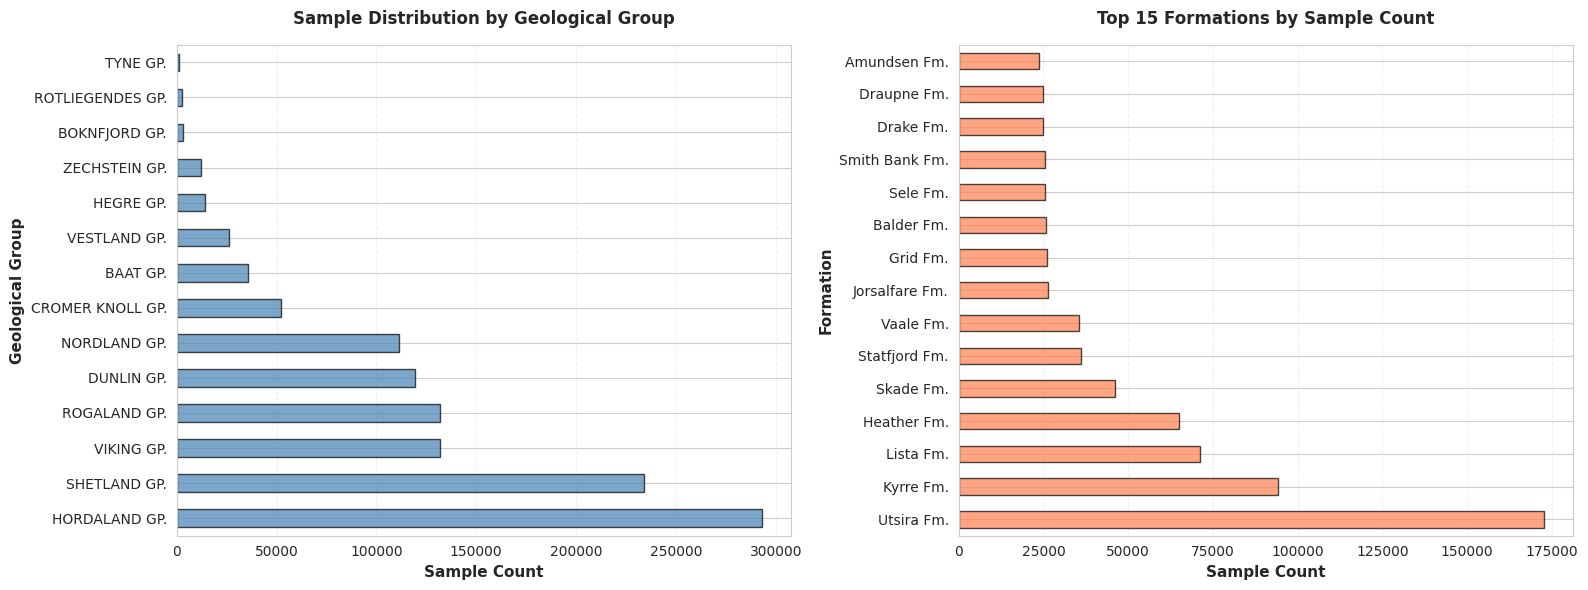

In [ ]:
start_time = time.time()

# Visualizations
if 'GROUP' in train.columns or 'FORMATION' in train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot GROUP distribution
    if 'GROUP' in train.columns:
        ax1 = axes[0]
        group_counts.plot(kind='barh', ax=ax1, color='steelblue',
                         alpha=0.7, edgecolor='black')
        ax1.set_xlabel('Sample Count', fontsize=11, fontweight='bold')
        ax1.set_ylabel('Geological Group', fontsize=11, fontweight='bold')
        ax1.set_title('Sample Distribution by Geological Group',
                     fontsize=12, fontweight='bold', pad=15)
        ax1.grid(axis='x', alpha=0.3, linestyle='--')

    # Plot top FORMATIONS
    if 'FORMATION' in train.columns:
        ax2 = axes[1]
        formation_counts.head(15).plot(kind='barh', ax=ax2, color='coral',
                                       alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Sample Count', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Formation', fontsize=11, fontweight='bold')
        ax2.set_title('Top 15 Formations by Sample Count',
                     fontsize=12, fontweight='bold', pad=15)
        ax2.grid(axis='x', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.show()

LITHOLOGY DISTRIBUTION BY GEOLOGICAL GROUP


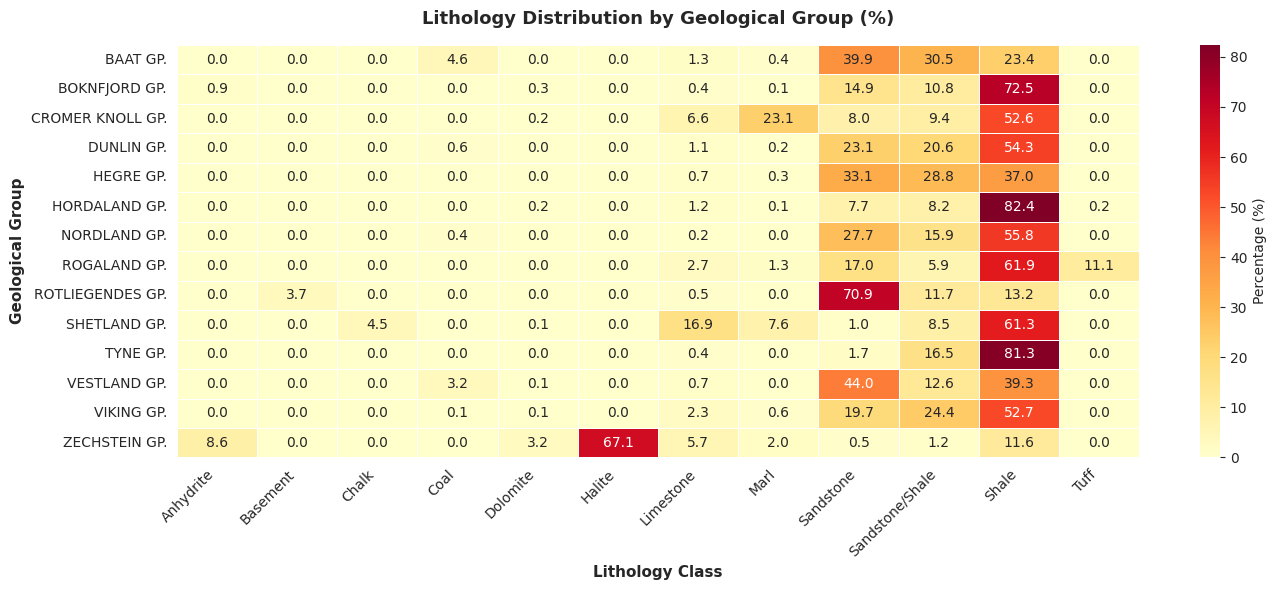


 Geological context analysis completed successfully!

Runtime: 0.70 seconds


In [ ]:
start_time = time.time()
# Cross-tabulation: Lithology by GROUP
if 'GROUP' in train.columns and 'Lithology_Name' in train.columns:
    print("LITHOLOGY DISTRIBUTION BY GEOLOGICAL GROUP")

    crosstab = pd.crosstab(train['GROUP'], train['Lithology_Name'],
                          normalize='index') * 100

    plt.figure(figsize=(14, 6))
    sns.heatmap(crosstab, annot=True, fmt='.1f', cmap='YlOrRd',
               cbar_kws={'label': 'Percentage (%)'}, linewidths=0.5)
    plt.title('Lithology Distribution by Geological Group (%)',
             fontsize=13, fontweight='bold', pad=15)
    plt.xlabel('Lithology Class', fontsize=11, fontweight='bold')
    plt.ylabel('Geological Group', fontsize=11, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("\n Geological context analysis completed successfully!")

print(f"\nRuntime: {time.time() - start_time:.2f} seconds")